In [2]:
# GET PARAMETERS
import os 
import sys
import pandas as pd
import matplotlib.pyplot as plt 
import torch 
import numpy as np 
# Get Parent folder : 
current_path = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_path, '..'))
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)

from load_inputs.Lyon.netmob.netmob_POIs import load_data_npy,START,END,FREQ
from argparse import Namespace
from build_inputs.load_contextual_data import replace_heure_d_ete
from constants.paths import FOLDER_PATH

/tmp/ipykernel_195606/3641102989.py:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '625040.1200000001' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  s_netmob[s_netmob > Q] = Q # Keep only values above the 99th percentile


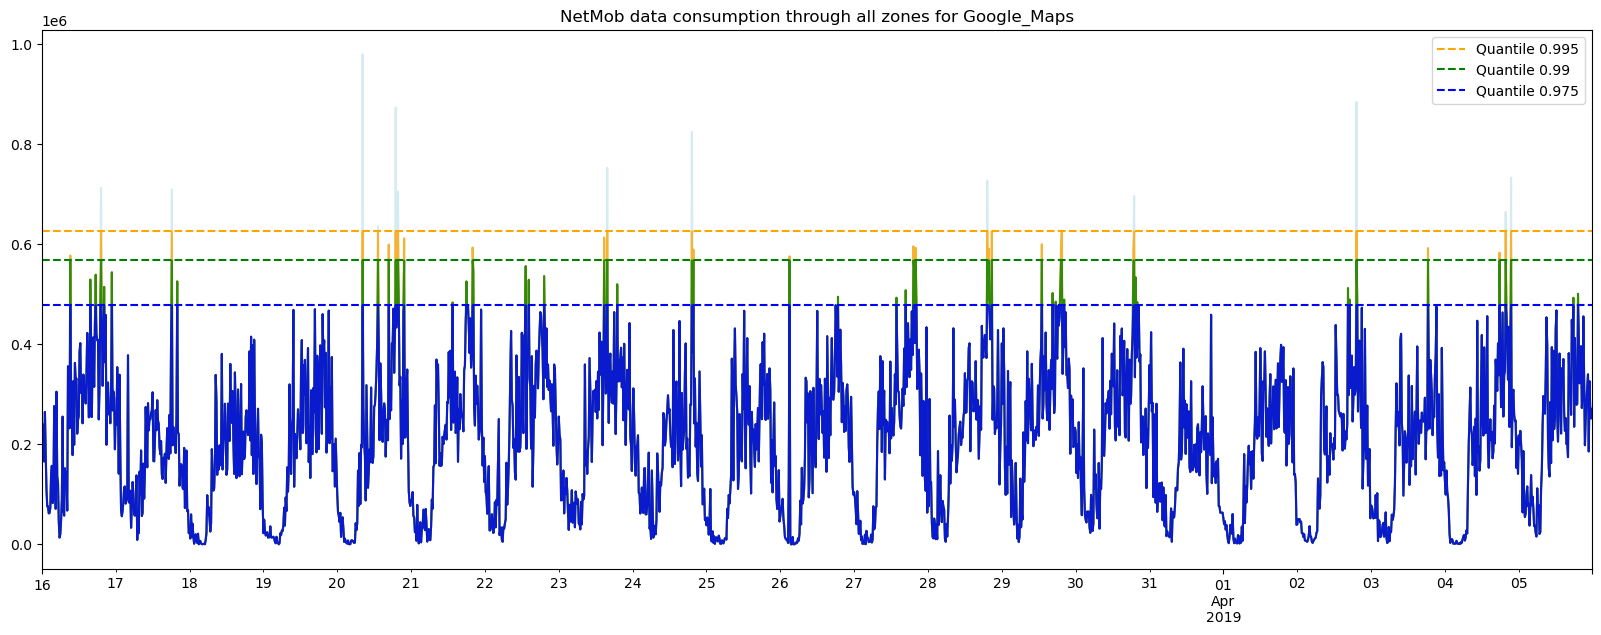

In [3]:
index_netmob = pd.date_range(start = START,end = END,freq=FREQ)[:-1]

app = 'Google_Maps' # Deezer # Web_Weather # Google_Maps
mode = 'DL'
save_folder = f"{FOLDER_PATH}/POIs/netmob_POI_Lyon/Inputs/agg_TS"
folder_path_to_save_agg_data = f"{save_folder}/iris/{app}/{mode}"
netmob_T = torch.Tensor(np.load(open(f"{folder_path_to_save_agg_data}/data.npy","rb"))).T
# netmob_T = load_data_npy(FOLDER_PATH,args_init2).T

netmob_T = replace_heure_d_ete(netmob_T,start = 1532, end = 1536)

iris_zone = -1
s_netmob = pd.Series(netmob_T[:,iris_zone],index =index_netmob)
s_netmob_init = s_netmob.copy()
mask  = s_netmob.isna()
assert len(s_netmob[mask]) == 0, f"NetMob data contains NaN values at {s_netmob[mask].index} for zone {iris_zone}."


colors = ['orange','green','blue','red','purple','brown','pink']
plt.figure(figsize=(20,7))
s_netmob.iloc[:7*96*3].plot(color = 'lightblue',alpha = 0.5)
for k,quantile in enumerate([0.995,0.99,0.975]):
    Q  = s_netmob_init.quantile(quantile)
    s_netmob[s_netmob > Q] = Q # Keep only values above the 99th percentile
    s_netmob.iloc[:7*96*3].plot(color = colors[k],alpha = 0.8)
    plt.hlines(Q,index_netmob.min(), index_netmob.max(), colors=colors[k], linestyles='dashed', label=f'Quantile {quantile}')
plt.legend()
plt.title(f"NetMob data consumption through all zones for {app}")
plt.show()